# Thing to consider while imputing most frequent values 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

# 1.  GarageQual column

<Axes: xlabel='GarageQual'>

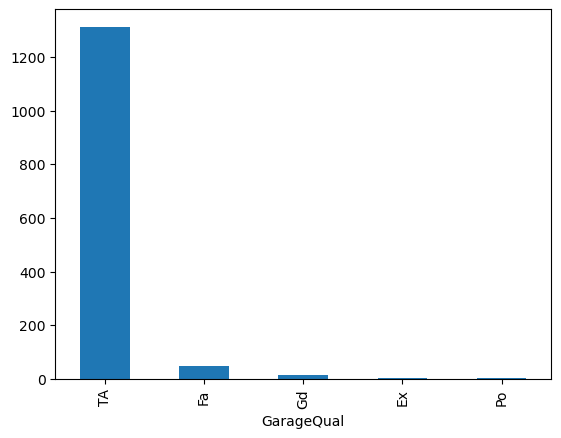

In [5]:
df['GarageQual'].value_counts().plot(kind='bar')

## pdf of Saleprice for GarageQual with TA and NA before imputation

Text(0.5, 1.0, 'SalePrice pdf for TA and NA values of GarageQual')

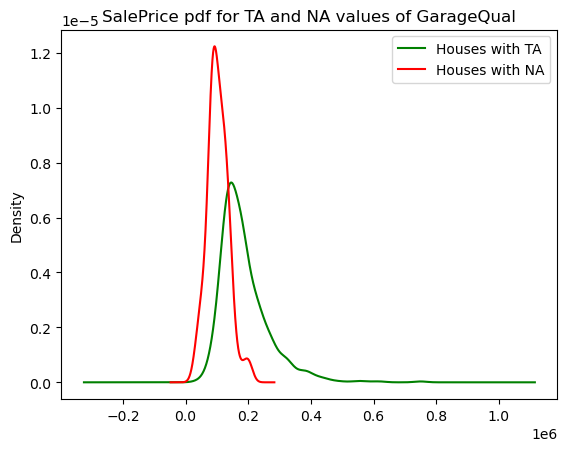

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color = 'green')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('SalePrice pdf for TA and NA values of GarageQual')

In [7]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

## pdf of SalePrice for houses with TA Before and After Imputation


In [8]:
df['GarageQual'].fillna(value='TA', inplace =True)

Text(0.5, 1.0, 'TA GarageQual SalePrice pdf')

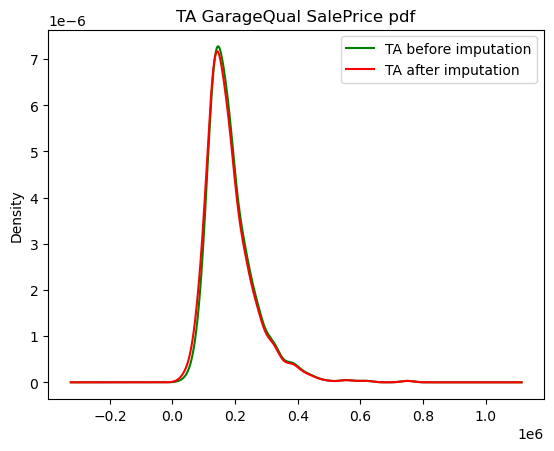

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax, color = 'green')
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['TA before imputation', 'TA after imputation']
ax.legend(lines, labels, loc='best')

plt.title('TA GarageQual SalePrice pdf')

# 2.  FireplaceQu column

In [12]:
df['FireplaceQu'].isnull().mean()

0.4726027397260274

#### 47% of values are missing in FireplaceQu column : Red Flag!!!! Let's check if the pdf of SalePrice for most frequent value of FireplaceQU column changes after imputation 

<Axes: xlabel='FireplaceQu'>

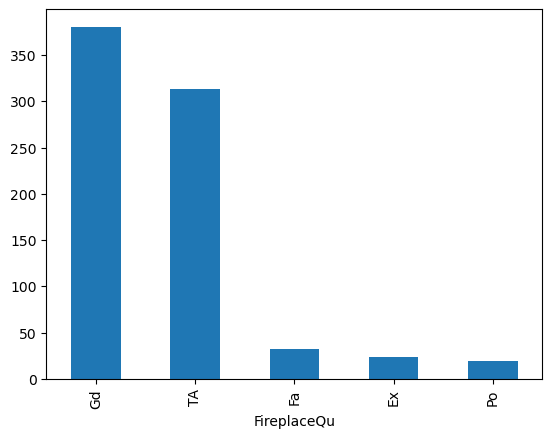

In [18]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
# before imputation

Text(0.5, 1.0, 'FireplaceQu')

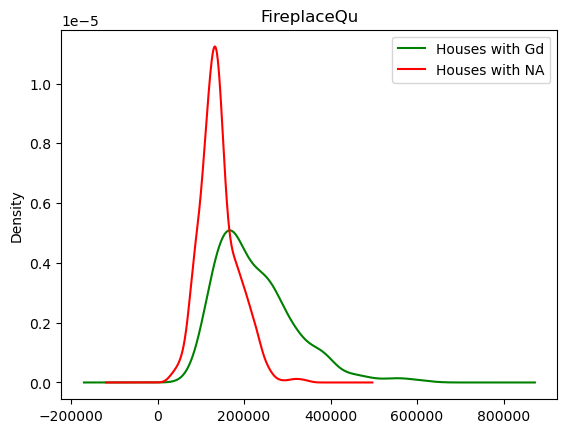

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color = 'green')
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [20]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [23]:
df['FireplaceQu'].fillna(value='Gd', inplace=True)

## pdf of SalePrice for houses with FireplaceQu value having Gd before and after most frequent value imputation

Text(0.5, 1.0, 'FireplaceQu')

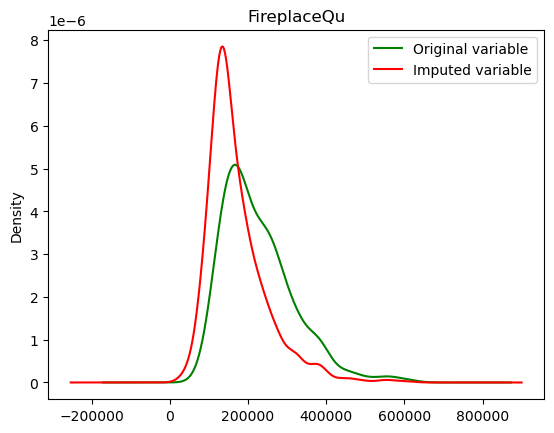

In [24]:
fig = plt.figure()
ax= fig.add_subplot(111)

temp.plot(kind='kde', ax=ax, color='green')
df[df['FireplaceQu']== 'Gd']['SalePrice'].plot(kind='kde', color='red', ax=ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

# Conclusion: GarageQual column can be imputed with most frequent values , whearas it's red flag to impute most frequent values to the FireplaceQu column